In [21]:
from src.preprocessing import denoise
from src.open_files import open_train, open_test
import matplotlib.pyplot as plt
%matplotlib widget
df_train = open_train().reset_index()
df_test = open_test().reset_index()

df_train_denoised = denoise(df_train.copy())


Plot the data

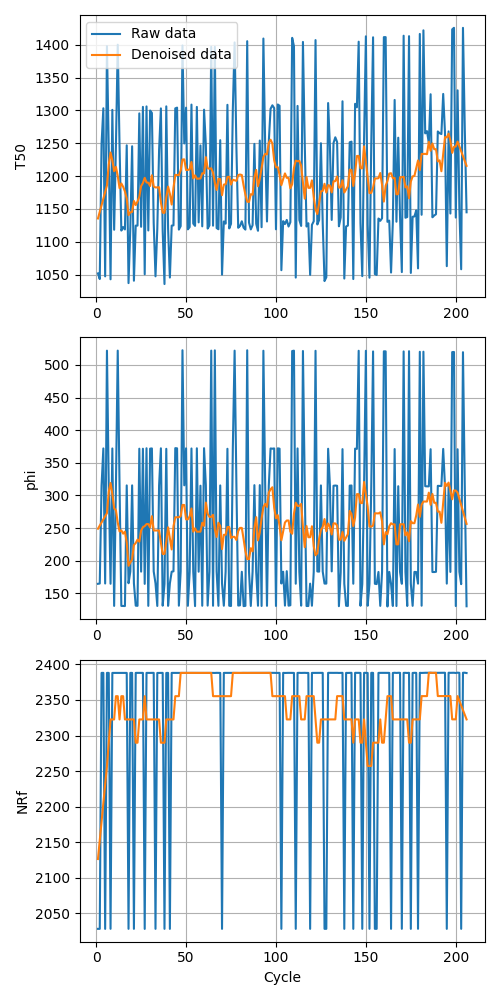

In [22]:
traj = '3_2'
df_traj1_denoised = df_train_denoised[df_train_denoised['TrajectoryID'] == traj]
df_traj1 = df_train[df_train['TrajectoryID'] == traj]
fig, ax = plt.subplots(3, 1, figsize=(5, 10))
ax[0].plot(df_traj1['Cycle'], df_traj1['T50'])
ax[0].plot(df_traj1['Cycle'], df_traj1_denoised['T50'])
ax[0].grid()
ax[0].legend(["Raw data", "Denoised data"])
ax[0].set_ylabel("T50")
ax[1].plot(df_traj1['Cycle'], df_traj1['phi'])
ax[1].plot(df_traj1['Cycle'], df_traj1_denoised['phi'])
ax[1].grid()
ax[1].set_ylabel("phi")
ax[2].plot(df_traj1['Cycle'], df_traj1['NRf'])
ax[2].plot(df_traj1['Cycle'], df_traj1_denoised['NRf'])
ax[2].grid()
ax[2].set_ylabel("NRf")
ax[2].set_xlabel("Cycle")
fig.tight_layout()
plt.show()

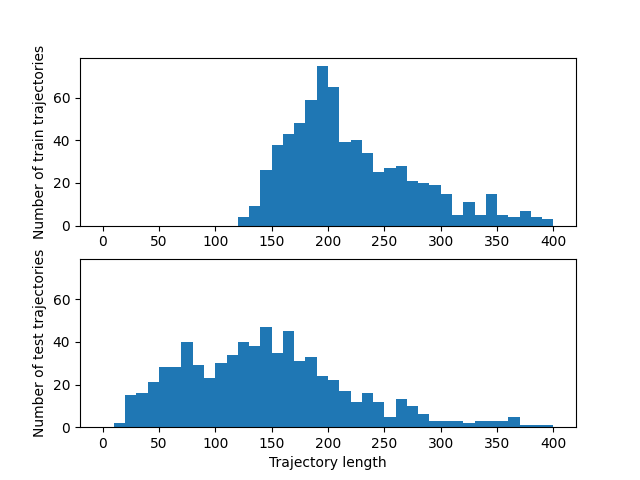

In [23]:
train_lengths = df_train.groupby('TrajectoryID')['Cycle'].max()
test_lengths = df_test.groupby('TrajectoryID')['Cycle'].max()
fig, ax = plt.subplots(2, 1, sharey=True)
ax[0].hist(train_lengths, bins=40, range=(0, 400))
ax[1].hist(test_lengths, bins=40, range=(0, 400))
ax[1].set_xlabel("Trajectory length")
ax[0].set_ylabel("Number of train trajectories")
ax[1].set_ylabel("Number of test trajectories")
plt.show()

Plot the results

In [ ]:
import pandas as pd
import json
import numpy as np

def plot_results_by_RUL(ax, color, targets, results):
    df = pd.DataFrame({'targets' : targets, 'results' : results})
    df["errors"] = (df['targets'] - df['results'])**2
    RMS = df.sort_values('targets').groupby('targets')['errors'].mean().apply(np.sqrt)
    ax.plot(RMS.index, RMS.values, c=color)


def plot_results_by_bin_RUL(ax, color, targets, results):
    df = pd.DataFrame({'targets' : targets, 'results' : results})
    df["errors"] = (df['targets'] - df['results'])**2
    df['bins'] = (df['targets']/20).astype(int)
    df = df.sort_values('bins')
    RMS = df.groupby('bins')['errors'].mean().apply(np.sqrt)
    ax.plot(RMS.index, RMS.values, c=color, marker='o', markersize=12)
    ax.set_xticks(df['bins'], df['bins'].apply(lambda bin: str(bin*20) + '-' + str((bin+1)*20)))

## By window on file 1 only

11296
11296


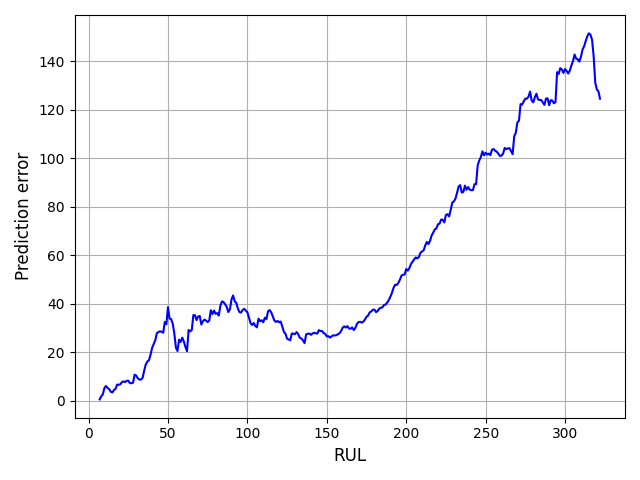

In [25]:
with open("results_encdl-19-3bywindow.json") as f:
    results = json.load(f)
    preds = results['pred']
    truth = results['truth']

print(len(preds))
print(len(truth))

plt.figure()
plot_results_by_RUL(plt.gca(), 'b', truth, preds)
plt.grid()
plt.xlabel('RUL', fontsize=12)
plt.ylabel("Prediction error", fontsize=12)
plt.tight_layout()
plt.savefig('plot_by_window.png')

## Main solution on all files and on file 1

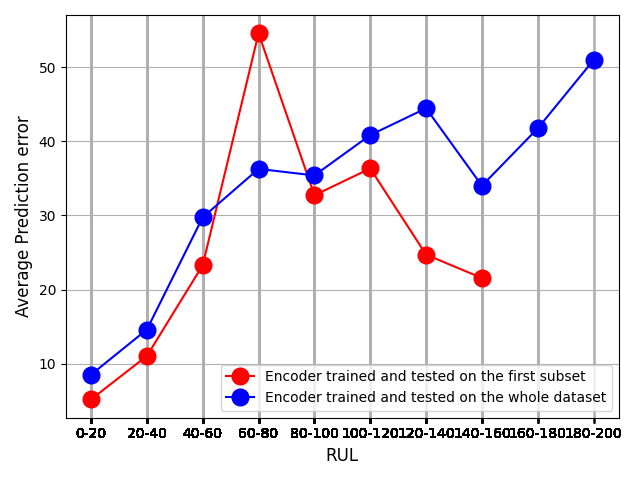

In [38]:
with open("results_full.json") as f:
    results_full = json.load(f)
with open("targets19.json") as f:
    targets_full = json.load(f)
with open("results_encdl-19-3.json") as f:
    results = json.load(f)
with open("targets30.json") as f:
    targets = json.load(f)

plt.figure()

plt.grid()
plot_results_by_bin_RUL(plt.gca(), 'r', targets, results)
plot_results_by_bin_RUL(plt.gca(), 'b', targets_full, results_full)

plt.xlabel('RUL', fontsize=12)
plt.ylabel("Average Prediction error", fontsize=12)
plt.legend([ 'Encoder trained and tested on the first subset', 'Encoder trained and tested on the whole dataset'])
plt.tight_layout()
plt.savefig('scatter2.png')

## Compare windows

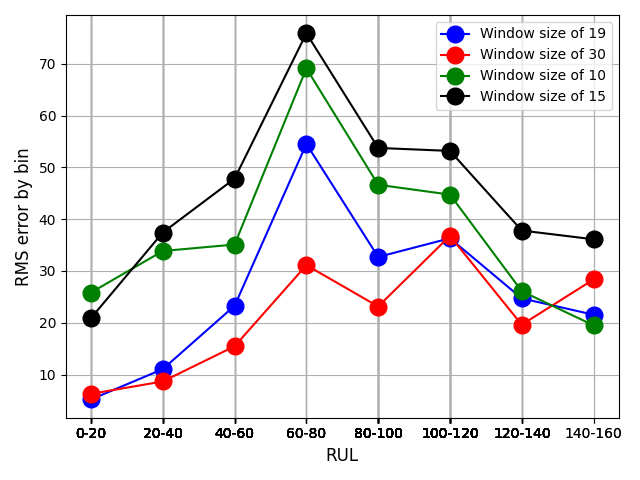

In [29]:
with open("results_encdl-19-3.json") as f:
    results19 = json.load(f)
with open("targets30.json") as f:
    targets = json.load(f)
with open("results_encdl-10-3.json") as f:
    results10 = json.load(f)
with open("results_encdl-15-3.json") as f:
    results15 = json.load(f)
with open("results_encdl-30-3.json") as f:
    results30 = json.load(f)

plt.figure()
plot_results_by_bin_RUL(plt.gca(), 'b', targets, results19)
plot_results_by_bin_RUL(plt.gca(), 'r', targets, results30)
plot_results_by_bin_RUL(plt.gca(), 'g', targets, results10)
plot_results_by_bin_RUL(plt.gca(), 'k', targets, results15)

plt.grid()
plt.xlabel('RUL', fontsize=12)
plt.ylabel("RMS error by bin", fontsize=12)
plt.legend(['Window size of 19', 'Window size of 30', 'Window size of 10', 'Window size of 15'])
plt.tight_layout()
plt.savefig('window.png')

## Compare pretraining

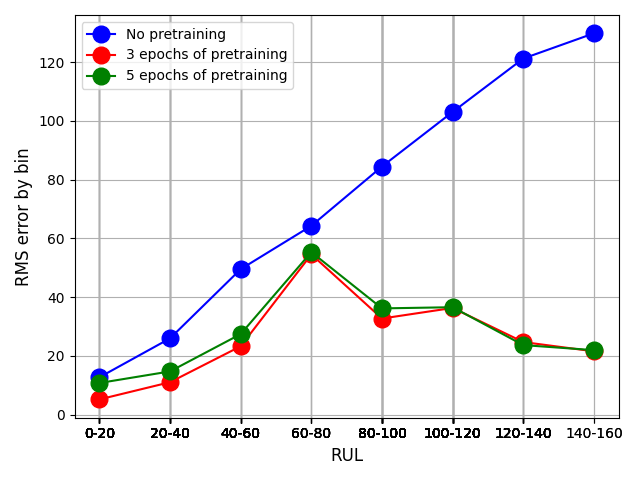

In [30]:
with open("results_encdl-19-3.json") as f:
    results19 = json.load(f)
with open("targets30.json") as f:
    targets = json.load(f)
with open("results_encdl-19-0.json") as f:
    results10 = json.load(f)
with open("results_encdl-19-5.json") as f:
    results15 = json.load(f)

plt.figure()
plot_results_by_bin_RUL(plt.gca(), 'b', targets, results10)
plot_results_by_bin_RUL(plt.gca(), 'r', targets, results19)
plot_results_by_bin_RUL(plt.gca(), 'g', targets, results15)

plt.grid()
plt.xlabel('RUL', fontsize=12)
plt.ylabel("RMS error by bin", fontsize=12)
plt.legend(['No pretraining', '3 epochs of pretraining', '5 epochs of pretraining'])
plt.tight_layout()
plt.savefig('pretraining.png')

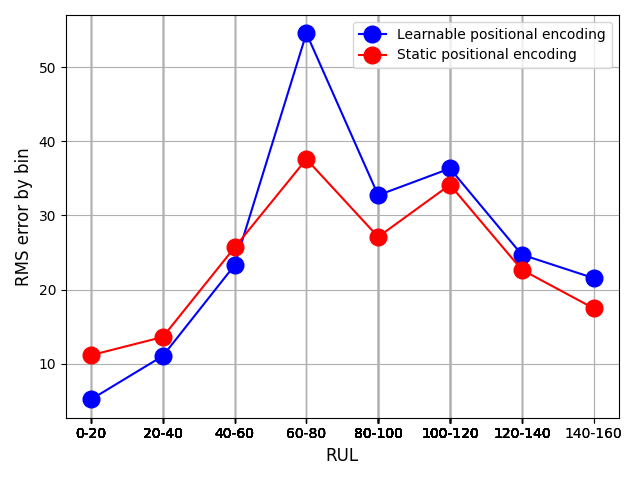

In [31]:
with open("results_encdl-19-3.json") as f:
    results19 = json.load(f)
with open("targets30.json") as f:
    targets = json.load(f)
with open("results_encds-19-3.json") as f:
    results10 = json.load(f)


plt.figure()
plot_results_by_bin_RUL(plt.gca(), 'b', targets, results19)
plot_results_by_bin_RUL(plt.gca(), 'r', targets, results10)

plt.grid()
plt.xlabel('RUL', fontsize=12)
plt.ylabel("RMS error by bin", fontsize=12)
plt.legend(['Learnable positional encoding', 'Static positional encoding'])
plt.tight_layout()
plt.savefig('pe.png')

Compare models

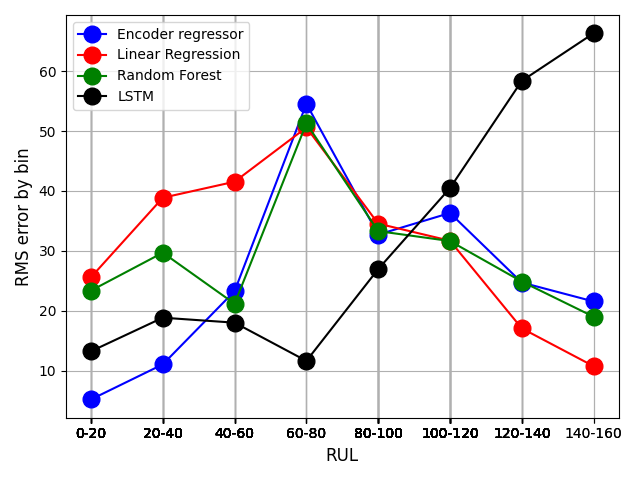

In [32]:
with open("results_encdl-19-3.json") as f:
    encoder = json.load(f)
with open("targets30.json") as f:
    targets = json.load(f)
with open("results_lr.json") as f:
    lr = json.load(f)
with open("results_rf.json") as f:
    rf = json.load(f)
with open("results_lstm.json") as f:
    lstm = json.load(f)

plt.figure()
plot_results_by_bin_RUL(plt.gca(), 'b', targets, encoder)
plot_results_by_bin_RUL(plt.gca(), 'r', targets, lr)
plot_results_by_bin_RUL(plt.gca(), 'g', targets, rf)
plot_results_by_bin_RUL(plt.gca(), 'k', targets, lstm)

plt.grid()
plt.xlabel('RUL', fontsize=12)
plt.ylabel("RMS error by bin", fontsize=12)
plt.legend(['Encoder regressor', 'Linear Regression', 'Random Forest', 'LSTM'])
plt.tight_layout()
plt.savefig('comparison1.png')

## Aggregation

In [33]:
path = "results_encdl-19-3bywindow.json"
with open(path, 'r') as f:
    results = json.load(f)
    y_test_pred = results['pred']
    tids_test = results['tids']
    cycles_test = results['cycles']
    y_test = results['truth']

from src.postprocessing import align, aggregate, aggregate2
import numpy as np
df_pred = align(y_test_pred, cycles_test, tids_test)

c:\Users\tangu\Tanguy\Études\Polito S3\Data Science Project\2024-P12-TTF\src\postprocessing.py:21: RuntimeWarning: invalid value encountered in scalar divide
  RULs.append(np.sum(results_to_be_considered*weights)/np.sum(weights))


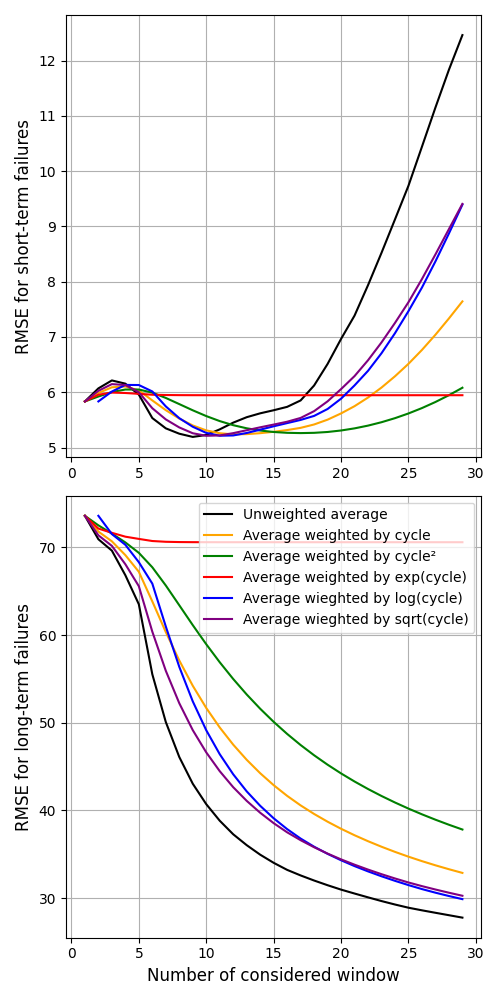

In [34]:
results_small = []
results_high = []
for agg in [
    lambda t:t**0,
    lambda t:t,
    lambda t:t**2,
    lambda t:np.exp(t),
    lambda t:np.log(t),
    lambda t:np.sqrt(t)
]:
    results_small.append([])
    results_high.append([])
    for N in range(1, 30):
        test_ruls, y = aggregate(df_pred, y_test, N, method=agg)
        rms = np.sqrt(np.mean((test_ruls[y < 20] - y[y < 20])**2))
        results_small[-1].append(rms)
        rms = np.sqrt(np.mean((test_ruls[y >= 20] - y[y >= 20])**2))
        results_high[-1].append(rms)

colors = ['black', 'orange', 'green', 'red', 'blue', 'purple']

fig, ax = plt.subplots(2, 1, figsize=(5, 10))
for ress, resh, c in zip(results_small, results_high, colors):
    ax[0].plot(range(1, 30), ress, c=c)
    ax[1].plot(range(1, 30), resh, c=c)

ax[0].grid()
ax[0].set_ylabel("RMSE for short-term failures", fontsize=12)


ax[1].grid()
ax[1].set_xlabel("Number of considered window", fontsize=12)
ax[1].set_ylabel("RMSE for long-term failures", fontsize=12)
ax[1].legend(
    ['Unweighted average',
     'Average weighted by cycle',
     'Average weighted by cycle²',
     'Average weighted by exp(cycle)',
     'Average wieghted by log(cycle)',
     'Average wieghted by sqrt(cycle)'
    ])
plt.tight_layout()
plt.savefig("Aggregation1.png")

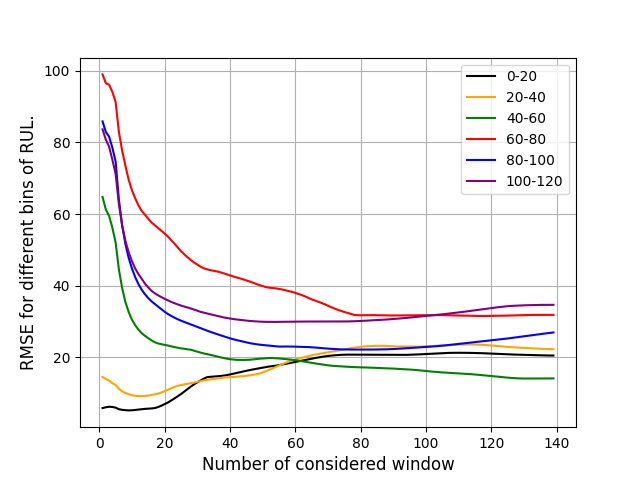

In [35]:
results = []
for th in [0, 20, 40, 60, 80, 100]:
    results.append([])
    for N in range(1, 140):
        test_ruls, y = aggregate(df_pred, y_test, N)
        rms = np.sqrt(np.mean((test_ruls[(th <= y) & (y < th + 20)] - y[(th <= y) & (y < th + 20)])**2))
        results[-1].append(rms)

colors = ['black', 'orange', 'green', 'red', 'blue', 'purple']

plt.figure()
for res, c in zip(results, colors):
    plt.plot(range(1, 140), res, c=c)
plt.grid()
plt.xlabel("Number of considered window", fontsize=12)
plt.ylabel("RMSE for different bins of RUL.", fontsize=12)
plt.legend(['0-20', '20-40', '40-60', '60-80', '80-100', '100-120'])
plt.savefig("Aggregation3.png")

## Best first avlue to check

In [36]:
path = "results_encdl-19-3bywindow2.json"
import json
with open(path, 'r') as f:
    results = json.load(f)
    y_test_pred = results['pred']
    tids_test = results['tids']
    cycles_test = results['cycles']
    y_test = results['truth']

from src.postprocessing import align, aggregate2
import numpy as np
df_pred = align(y_test_pred, cycles_test, tids_test)

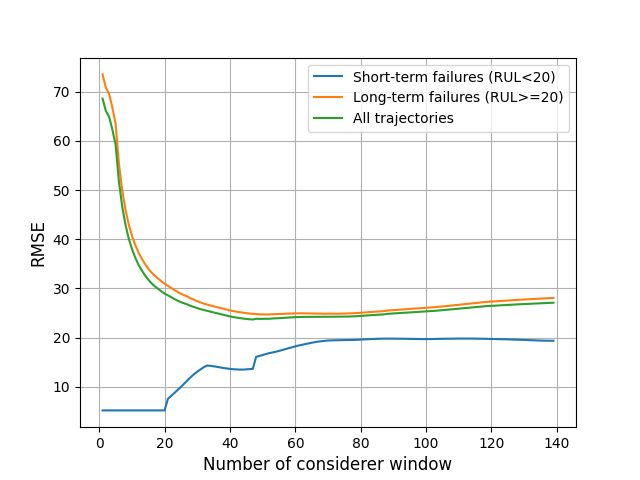

In [37]:
results_small = []
results_high = []
results_all = []
for N in range(1, 140):
    test_ruls, y = aggregate2(df_pred, y_test, 9, N)
    rms = np.sqrt(np.mean((test_ruls[y < 20] - y[y < 20])**2))
    results_small.append(rms)
    rms = np.sqrt(np.mean((test_ruls[y >= 20] - y[y >= 20])**2))
    results_high.append(rms)
    rms = np.sqrt(np.mean((test_ruls - y)**2))
    results_all.append(rms)

colors = ['black', 'orange', 'green', 'red', 'blue', 'purple']
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, 140), results_small)
plt.plot(range(1, 140), results_high)
plt.plot(range(1, 140), results_all)


plt.grid()
plt.xlabel("Number of considerer window", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend(['Short-term failures (RUL<20)', 'Long-term failures (RUL>=20)', 'All trajectories'])
plt.savefig("Aggregation2.png")

best algorithm is with 20 for short term and 45 for all. We will use 20 to enhance short-term prodecitions